In [7]:
import pandas as pd
import numpy as np
from A5 import *

In [8]:
df_train = pd.read_table('data/crime-train.txt')
df_test = pd.read_table('data/crime-test.txt')

In [9]:
y_train = df_train['ViolentCrimesPerPop']
X_train = df_train.drop('ViolentCrimesPerPop', axis = 1)
y_test = df_test['ViolentCrimesPerPop']
X_test = df_test.drop('ViolentCrimesPerPop', axis = 1)

In [10]:
nonzeros = []
w_regularization_path = []
train_mse = []
test_mse = []
lambda_max = np.max(np.sum(2*X_train.values*(y_train.values - np.mean(y_train.values))[:, None], axis = 0))
lambdas = [lambda_max/(2**i) for i in range(17)]

w_init = None
for reg_lambda in lambdas:
    model = Lasso(reg_lambda = reg_lambda)
    model.fit(X_train.values,y_train.values, w_init, delta = 1e-4)
    w_init = np.copy(model.w) #initialize with the previous solution, this is even faster and the problem is cvx anyway
    w_regularization_path.append(np.copy(model.w))
    total_num_of_nonzeros = np.sum(abs(model.w) > 1e-14)
    nonzeros.append(total_num_of_nonzeros)
    train_mse.append(mse(model.predict(X_train), y_train))
    test_mse.append(mse(model.predict(X_test), y_test))
    print('Current nonzero number:', np.sum(abs(model.w) > 1e-14))

shape a: (95,) should be  95
Iter  1  Loss: 84.7669615047022
converged in:  1
Current nonzero number: 0
shape a: (95,) should be  95
Iter  1  Loss: 80.30918064094823
Iter  2  Loss: 74.77100667474343
Iter  3  Loss: 73.71171034072604
Iter  4  Loss: 73.31872670337768
Iter  5  Loss: 73.03331715991729
Iter  6  Loss: 72.81560230021265
Iter  7  Loss: 72.64610841338695
Iter  8  Loss: 72.6401602133342
Iter  9  Loss: 72.63683667166917
Iter  10  Loss: 72.63497866933531
Iter  11  Loss: 72.63393996616546
Iter  12  Loss: 72.63335928644533
Iter  13  Loss: 72.63303466152155
Iter  14  Loss: 72.6328531822353
Iter  15  Loss: 72.63275172751348
Iter  16  Loss: 72.63269500996303
Iter  17  Loss: 72.63266330241433
Iter  18  Loss: 72.63264557653167
converged in:  18
Current nonzero number: 2
shape a: (95,) should be  95
Iter  1  Loss: 58.73034666917371
Iter  2  Loss: 57.88011997570014
Iter  3  Loss: 57.36695548145086
Iter  4  Loss: 57.17156400425331
Iter  5  Loss: 57.024163109938726
Iter  6  Loss: 56.996800933

Iter  22  Loss: 27.606661514568877
Iter  23  Loss: 27.60460474803924
Iter  24  Loss: 27.602642008266095
Iter  25  Loss: 27.600765498035813
Iter  26  Loss: 27.59896829791671
Iter  27  Loss: 27.59741698571481
Iter  28  Loss: 27.59603171742136
Iter  29  Loss: 27.594725379234465
Iter  30  Loss: 27.593491139091636
Iter  31  Loss: 27.59232269179769
Iter  32  Loss: 27.591214514549105
Iter  33  Loss: 27.590161791528335
Iter  34  Loss: 27.589160290519366
Iter  35  Loss: 27.588206250806046
Iter  36  Loss: 27.587296297856234
Iter  37  Loss: 27.586427381476742
Iter  38  Loss: 27.585599356468524
Iter  39  Loss: 27.584810471647614
Iter  40  Loss: 27.58405629639887
Iter  41  Loss: 27.583334474300926
Iter  42  Loss: 27.582642977290252
Iter  43  Loss: 27.581979946500734
Iter  44  Loss: 27.581343666817666
Iter  45  Loss: 27.58073254929202
Iter  46  Loss: 27.580145117632757
Iter  47  Loss: 27.579579997004842
Iter  48  Loss: 27.579033435816708
Iter  49  Loss: 27.578500281018908
Iter  50  Loss: 27.57797880

Iter  72  Loss: 26.922264761341317
Iter  73  Loss: 26.922073335477435
Iter  74  Loss: 26.92188701746341
Iter  75  Loss: 26.921705627285576
Iter  76  Loss: 26.921528992082298
Iter  77  Loss: 26.92135694580946
Iter  78  Loss: 26.92118932893723
Iter  79  Loss: 26.921025988172747
Iter  80  Loss: 26.920866776204676
Iter  81  Loss: 26.9207115514657
Iter  82  Loss: 26.920560177910207
Iter  83  Loss: 26.92041252480445
Iter  84  Loss: 26.920268466527254
Iter  85  Loss: 26.92012788237956
Iter  86  Loss: 26.91999065640178
Iter  87  Loss: 26.919856677197444
Iter  88  Loss: 26.91972583776289
Iter  89  Loss: 26.919598035322075
Iter  90  Loss: 26.919473171166103
Iter  91  Loss: 26.91935115049731
Iter  92  Loss: 26.919231882277444
Iter  93  Loss: 26.91911527908003
Iter  94  Loss: 26.91900125694665
Iter  95  Loss: 26.918889735247138
Iter  96  Loss: 26.918780636543698
Iter  97  Loss: 26.91867388645903
Iter  98  Loss: 26.9185694135482
Iter  99  Loss: 26.918467149174592
Iter  100  Loss: 26.918367027389845

Iter  26  Loss: 26.16497053887533
Iter  27  Loss: 26.164770266509322
Iter  28  Loss: 26.164573011760698
Iter  29  Loss: 26.16437872131133
Iter  30  Loss: 26.164187342841416
Iter  31  Loss: 26.16399882495509
Iter  32  Loss: 26.16381311712935
Iter  33  Loss: 26.16363016967922
Iter  34  Loss: 26.163449933733848
Iter  35  Loss: 26.163272361219803
Iter  36  Loss: 26.16309740484862
Iter  37  Loss: 26.162925018106918
Iter  38  Loss: 26.162755155247453
Iter  39  Loss: 26.16258777128033
Iter  40  Loss: 26.1624228219638
Iter  41  Loss: 26.162260263794366
Iter  42  Loss: 26.162100053996
Iter  43  Loss: 26.1619421505086
Iter  44  Loss: 26.161786511975745
Iter  45  Loss: 26.161633097731986
Iter  46  Loss: 26.161481867789767
Iter  47  Loss: 26.161332782826282
Iter  48  Loss: 26.161185804170405
Iter  49  Loss: 26.16104089378995
Iter  50  Loss: 26.160898014279304
Iter  51  Loss: 26.160757128847607
Iter  52  Loss: 26.160618201307685
Iter  53  Loss: 26.160481196065568
Iter  54  Loss: 26.16034607811087
I

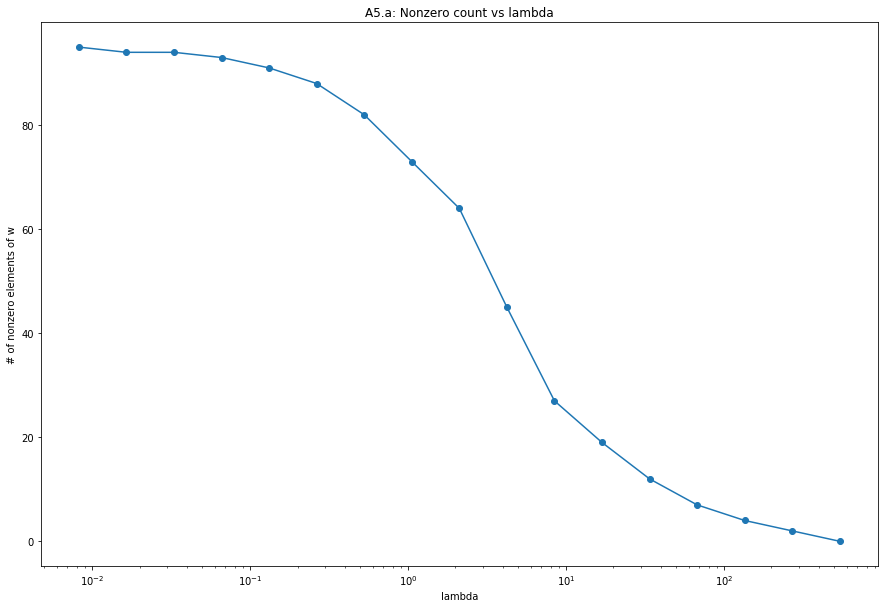

In [12]:
#Part a
plt.figure(figsize = (15,10))
plt.plot(lambdas, nonzeros, '-o')
plt.xscale('log')
plt.title('A5.a: Nonzero count vs lambda')
plt.xlabel('lambda')
plt.ylabel('# of nonzero elements of w')
plt.savefig('figures/A5a.pdf')
plt.show()

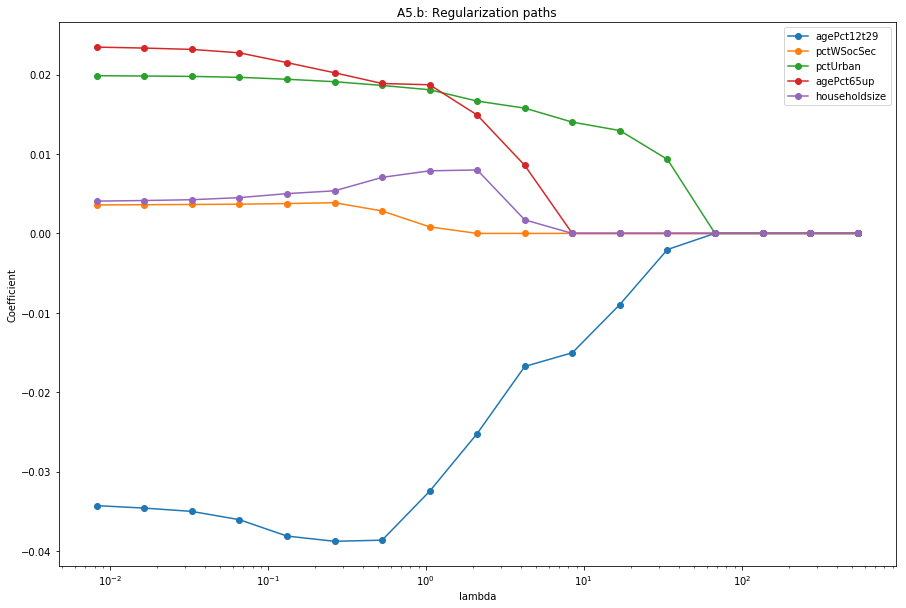

In [13]:
#Part b
plt.figure(figsize = (15,10))
w_regularization_path = np.array(w_regularization_path)
coeffs_names = ['agePct12t29', 'pctWSocSec', 'pctUrban', 'agePct65up', 'householdsize']
coeffs_indices = [X_train.columns.get_loc(i) for i in coeffs_names]
for coeff_path, label in zip(w_regularization_path[:, coeffs_indices].T, coeffs_names):
    plt.plot(lambdas, coeff_path, '-o', label=label,)
plt.legend()
plt.xscale('log')
plt.title('A5.b: Regularization paths')
plt.xlabel('lambda')
plt.ylabel('Coefficient')
plt.savefig('figures/A5b.pdf')


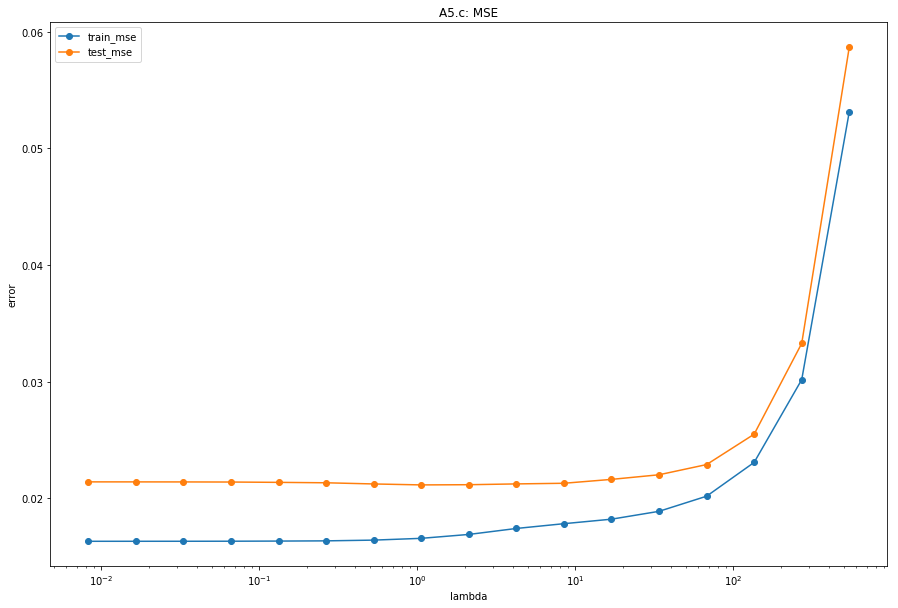

In [14]:
#Part c
plt.figure(figsize = (15,10))
plt.plot(lambdas, train_mse, '-o', label = 'train_mse')
plt.plot(lambdas, test_mse, '-o', label = 'test_mse')
plt.xscale('log')
plt.title('A5.c: MSE')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('error')
plt.savefig('figures/A5c.pdf')
plt.show()

In [15]:
#Part d
model = Lasso(reg_lambda = 30)
model.fit(X_train.values,y_train.values, w_init, delta = 1e-4)

shape a: (95,) should be  95
Iter  1  Loss: 65.40762206651523
Iter  2  Loss: 54.95523507439711
Iter  3  Loss: 48.40802179606233
Iter  4  Loss: 44.12128619594549
Iter  5  Loss: 41.05446865734586
Iter  6  Loss: 39.39028658917846
Iter  7  Loss: 38.48381815704414
Iter  8  Loss: 38.037191133138364
Iter  9  Loss: 37.625973728143876
Iter  10  Loss: 37.40814004754521
Iter  11  Loss: 37.32351235273503
Iter  12  Loss: 37.2734671579215
Iter  13  Loss: 37.25055925556778
Iter  14  Loss: 37.24889376059951
Iter  15  Loss: 37.24796287820445
Iter  16  Loss: 37.24740784697636
Iter  17  Loss: 37.247089240905694
Iter  18  Loss: 37.24691035989887
Iter  19  Loss: 37.246808061743934
Iter  20  Loss: 37.24674639802041
Iter  21  Loss: 37.2467067345064
Iter  22  Loss: 37.24667975759984
Iter  23  Loss: 37.246660710943466
converged in:  23


[65.40762206651523,
 54.95523507439711,
 48.40802179606233,
 44.12128619594549,
 41.05446865734586,
 39.39028658917846,
 38.48381815704414,
 38.037191133138364,
 37.625973728143876,
 37.40814004754521,
 37.32351235273503,
 37.2734671579215,
 37.25055925556778,
 37.24889376059951,
 37.24796287820445,
 37.24740784697636,
 37.247089240905694,
 37.24691035989887,
 37.246808061743934,
 37.24674639802041,
 37.2467067345064,
 37.24667975759984,
 37.246660710943466]

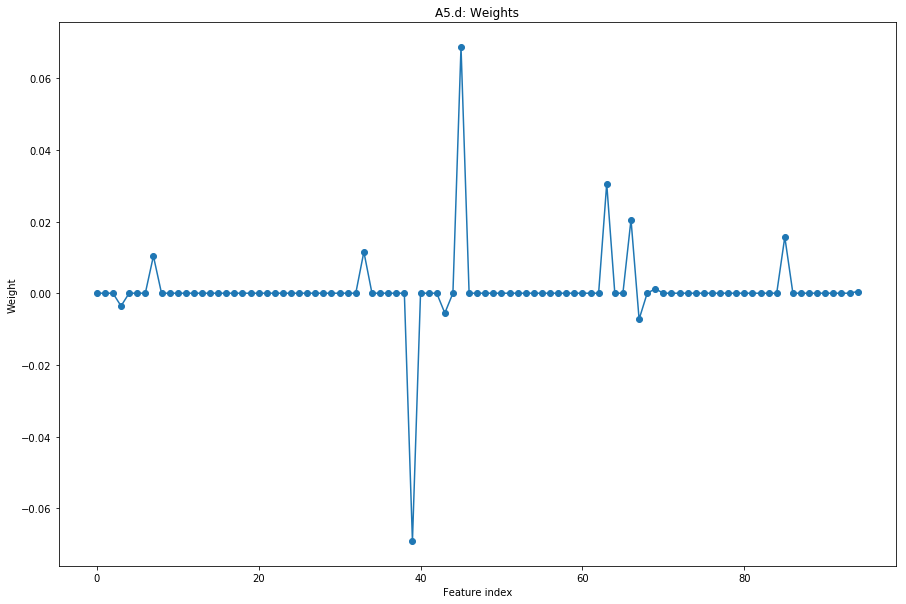

In [41]:
#Part c
plt.figure(figsize = (15,10))
plt.plot(model.w, '-o')
plt.title('A5.d: Weights')
plt.xlabel('Feature index')
plt.ylabel('Weight')
plt.savefig('figures/A5d.pdf')
plt.show()

In [42]:
print('Largest positive weight:', X_train.columns[np.argmax(model.w)])
print('Largest negative weight:', X_train.columns[np.argmin(model.w)])

Largest positive weight: PctIlleg
Largest negative weight: PctKids2Par
